<a href="https://colab.research.google.com/github/IshGish/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module5-sprint/DS9_W1D5_Sprint_Challenge_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

Check for missing/null values in the three dataframes

In [0]:
print(cell_phones.isnull().sum()
      ,'\n\n'
      ,population.isnull().sum()
      ,'\n\n'
      ,geo_country_codes.isnull().sum())

geo                  0
time                 0
cell_phones_total    0
dtype: int64 

 geo                 0
time                0
population_total    0
dtype: int64 

 geo        0
country    0
dtype: int64


In [0]:
print(cell_phones.head()
     ,'\n\n'
     ,cell_phones.tail())

   geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
2  abw  1970                0.0
3  abw  1975                0.0
4  abw  1976                0.0 

       geo  time  cell_phones_total
9210  zwe  2013         13633167.0
9211  zwe  2014         11798652.0
9212  zwe  2015         12757410.0
9213  zwe  2016         12878926.0
9214  zwe  2017         14092104.0


In [0]:
print(population.head()
     ,'\n\n'
     ,population.tail())

   geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000 

        geo  time  population_total
59292  zwe  2096          40469281
59293  zwe  2097          40533896
59294  zwe  2098          40591626
59295  zwe  2099          40642628
59296  zwe  2100          40687107


In [0]:
print(geo_country_codes.head()
     ,'\n\n'
     ,geo_country_codes.tail())

    geo      country
0  abkh     Abkhazia
1   abw        Aruba
2   afg  Afghanistan
3   ago       Angola
4   aia     Anguilla 

            geo               country
268  yem_south  South Yemen (former)
269        yug            Yugoslavia
270        zaf          South Africa
271        zmb                Zambia
272        zwe              Zimbabwe


Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phone_total"

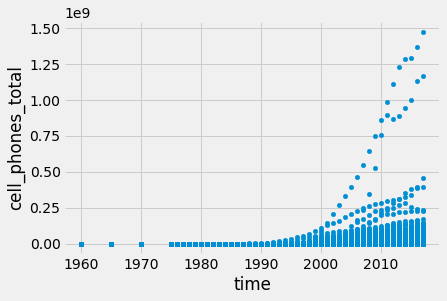

In [0]:
cell_phones.plot.scatter('time', 'cell_phones_total')
plt.show()

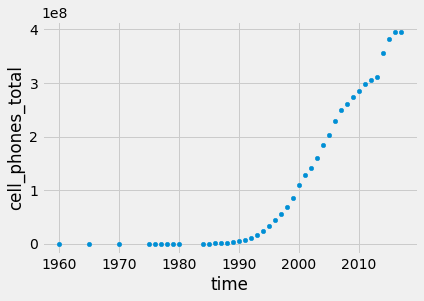

In [0]:
# Stretch 1
cell_phones_usa = cell_phones[cell_phones['geo'] == 'usa']
cell_phones_usa.plot.scatter('time', 'cell_phones_total')
plt.show()

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
cell_pop = pd.merge(cell_phones, population, how='inner')
cell_pop.shape
# Stretch 2
# We're doing an inner merge because we want the data they share to be combined
# This let's the extra columns get added on the end. 

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
df = pd.merge(cell_pop, geo_country_codes, how='inner')
df.shape

(8590, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
# Cell per person
# Divide the population by the total cell phones.
# This'll automatically generate to each country since that's our index.

df['cell_per_person'] = df['cell_phones_total'] / df['population_total']

In [0]:
df['cell_per_person'].tail()

8585    0.905587
8586    0.765566
8587    0.808585
8588    0.797439
8589    0.852522
Name: cell_per_person, dtype: float64

In [0]:
# Stretch 3
df['geo'] = df['geo'].str.upper()
print(df['geo'].head()
     ,df['geo'].tail())

0    AFG
1    AFG
2    AFG
3    AFG
4    AFG
Name: geo, dtype: object 8585    ZWE
8586    ZWE
8587    ZWE
8588    ZWE
8589    ZWE
Name: geo, dtype: object


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
df.head()

,geo,time,cell_phones_total,population_total,country
0,AFG,1960,0.0,8996351,Afghanistan
1,AFG,1965,0.0,9938414,Afghanistan
2,AFG,1970,0.0,11126123,Afghanistan
3,AFG,1975,0.0,12590286,Afghanistan
4,AFG,1976,0.0,12840299,Afghanistan


In [0]:
# Notes
df.describe(excude='number')

In [0]:
# Numeric
df.describe(include=np.number)

,time,cell_phones_total,population_total
count,8590.000000,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07
std,14.257975,5.573408e+07,1.161284e+08
min,1960.000000,0.000000e+00,4.433000e+03
25%,1983.000000,0.000000e+00,1.456148e+06
50%,1995.000000,6.200000e+03,5.725062e+06
75%,2006.000000,1.697652e+06,1.810581e+07
max,2017.000000,1.474097e+09,1.409517e+09


In [0]:
# Non-Numeric
df.describe(include=np.object)

,geo,country
count,8590,8590
unique,195,195
top,TTO,Lesotho
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
df = df.set_index('time')

In [0]:
df.loc[2017].sort_values(by='cell_phones_total', ascending=False).head()

,geo,cell_phones_total,population_total,country
time,,,,
2017,CHN,1.474097e+09,1409517397,China
2017,IND,1.168902e+09,1339180127,India
2017,IDN,4.589232e+08,263991379,Indonesia
2017,USA,3.958810e+08,324459463,United States
2017,BRA,2.364885e+08,209288278,Brazil


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [0]:
pd.crosstab(df['Year'], df['Occupation'], normalize='index')

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


### Part 2 — Recreate this explanatory visualization:



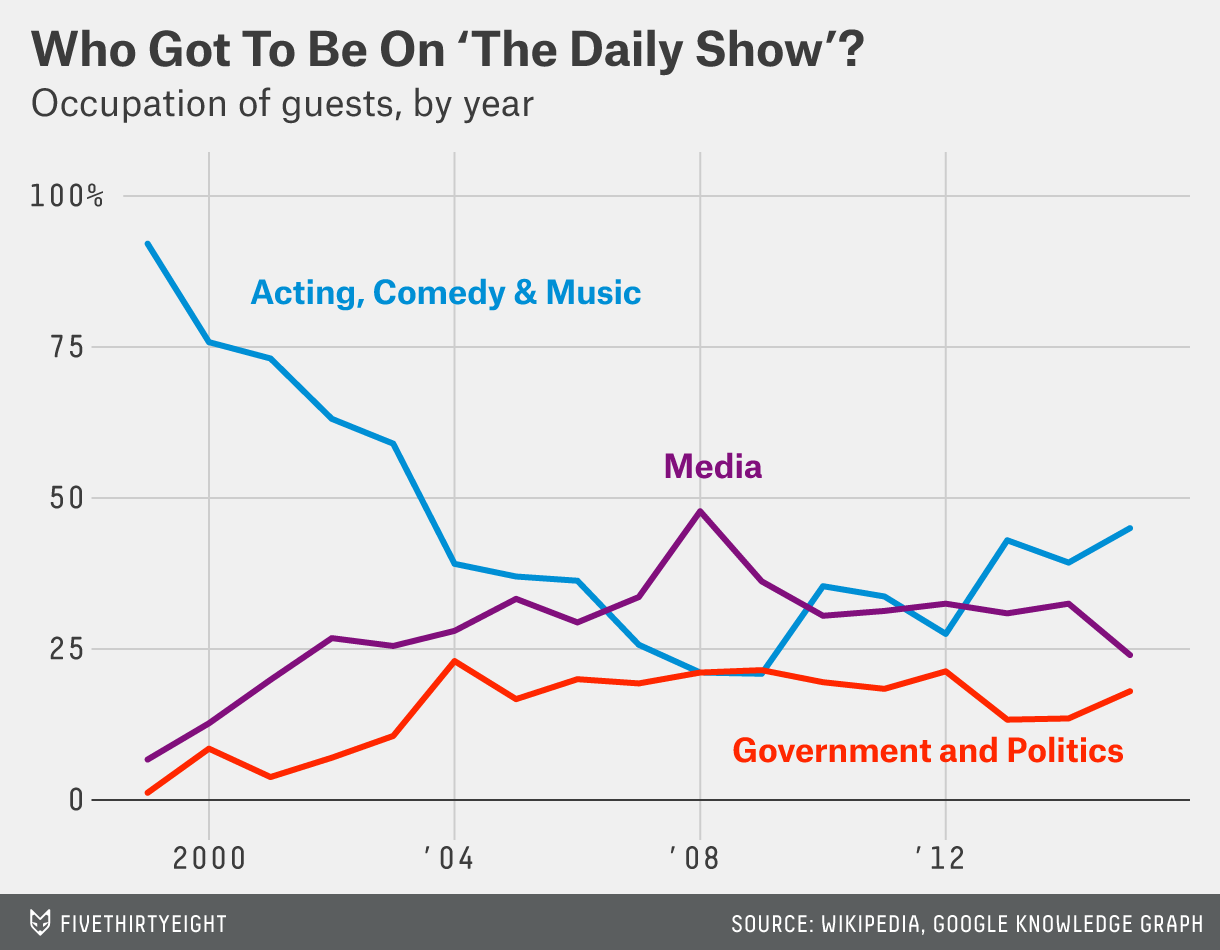

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

In [0]:
# This get's rid of that 'Other' so we just have 3 lines.
df = df[df['Occupation'] != 'Other']
df['Occupation'].unique()

array(['Acting, Comedy & Music', 'Media', 'Government and Politics'],
      dtype=object)

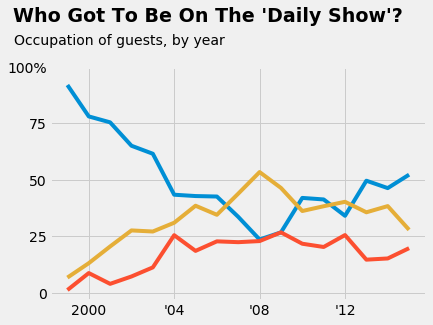

In [0]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.canvas.draw()

plt.plot(pd.crosstab(df['Year'], df['Occupation'], normalize='index'))

# These are a real pain. It goes by the numbers the graph uses, which makes it
# effectively a percentage once you get in the ballpark.
# Always make sure you get the data setup right first.
plt.text(1996.45, 1.2, "Who Got To Be On The 'Daily Show'?", fontsize=19, fontweight='bold')
plt.text(1996.5, 1.1, "Occupation of guests, by year", fontsize=14)

# Also a pain. This sets the numbers for the ticks to work with.
# Without it, it'll do it's own thing and you wont get the labels on right.
plt.xticks(range(2000, 2016, 4))
plt.yticks(np.arange(0.0, 1.25, 0.25))

# As long as the ranges share the number of items in your list, this will fit.
xlabels = ['2000', '\'04', '\'08', '\'12']
ylabels = ['0', '25', '50', '75', '100%']

# The documentation was not a help at all with this.
# It doesn't even show how it works.
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)


plt.show()

In [0]:
# Stretch 4 - Failed: Timed out

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.
